# Rugosity estimator
Welcome to the Rugosity tool.

This tool is designed to help you find the rugosity out of coral landscapes images.

It relies on 2 steps:
- Background identification using [Segment Anything Model](https://github.com/facebookresearch/segment-anything)
- Landscape skyline comparison with ruler size using [OpenCV](https://opencv.org/)

## Process
### 1. Access Google Colab
The user need to run thos notebook on [Google Colab](https://colab.research.google.com/?hl=fr).

### 2. Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit (Modifier)→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

### 3. Upload your data
Load the images you need to analyse.

### 4. Point several background points
To identify the background, the user needs to give several examples. **Use your mouse to few (3 to 10) points**.

### 5. Pick a rugosity method
There are several ways to compute rugosity, pick one among the several available.

### 6. Save the results on your laptop

## Basic command for the notebook
- Type Cmd/Ctrl+Enter to run the cell in place;

# Installation & Imports

In [7]:
%%capture
!git clone https://github.com/UgoDS/coral-rugosity-sam.git
%cd coral-rugosity-sam
# Interactivity in Google Colab
!pip install ipympl
# Vision tools
!pip install opencv-python matplotlib 'git+https://github.com/facebookresearch/segment-anything.git'
# Download SAM model
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [8]:
import sys

from google.colab import output

output.enable_custom_widget_manager()
%matplotlib ipympl

sys.path.append("/content/coral-rugosity-sam")

from utils.io_utils import upload_images
from utils.sam_utils import load_predictor, find_best_background_mask
from utils.image_utils import load_image, mark_background
from utils.mask_utils import find_contour_from_mask
from utils.metric_utils import (
    get_line_from_left_to_right,
    compute_rugosity,
    compute_mean_absolute_error,
)
from utils.plot_utils import plot_rugosity_results

predictor = load_predictor()

# Load your images
Here you need to manually upload your images into Colab.

In [ ]:
list_images = upload_images()

Saving Ti6m2008.04.JPG to Ti6m2008.04.JPG
User uploaded file "Ti6m2008.04.JPG" with length 2676060 bytes


['/content/images/Ti6m2008.04.JPG']

## Pick your image
Use the left panel of your screen to explore files and right click on the file explorator to get the image path.

Click on your image background to annotate

In [17]:
TARGET_IMAGE_PATH = "/content/images/Ha18m2008.05.JPG"
image_name = TARGET_IMAGE_PATH.split("/")[-1:].split(".")[:-1]
image = load_image(TARGET_IMAGE_PATH)
list_points = mark_background(TARGET_IMAGE_PATH)

# Find background & Compute Rugosity

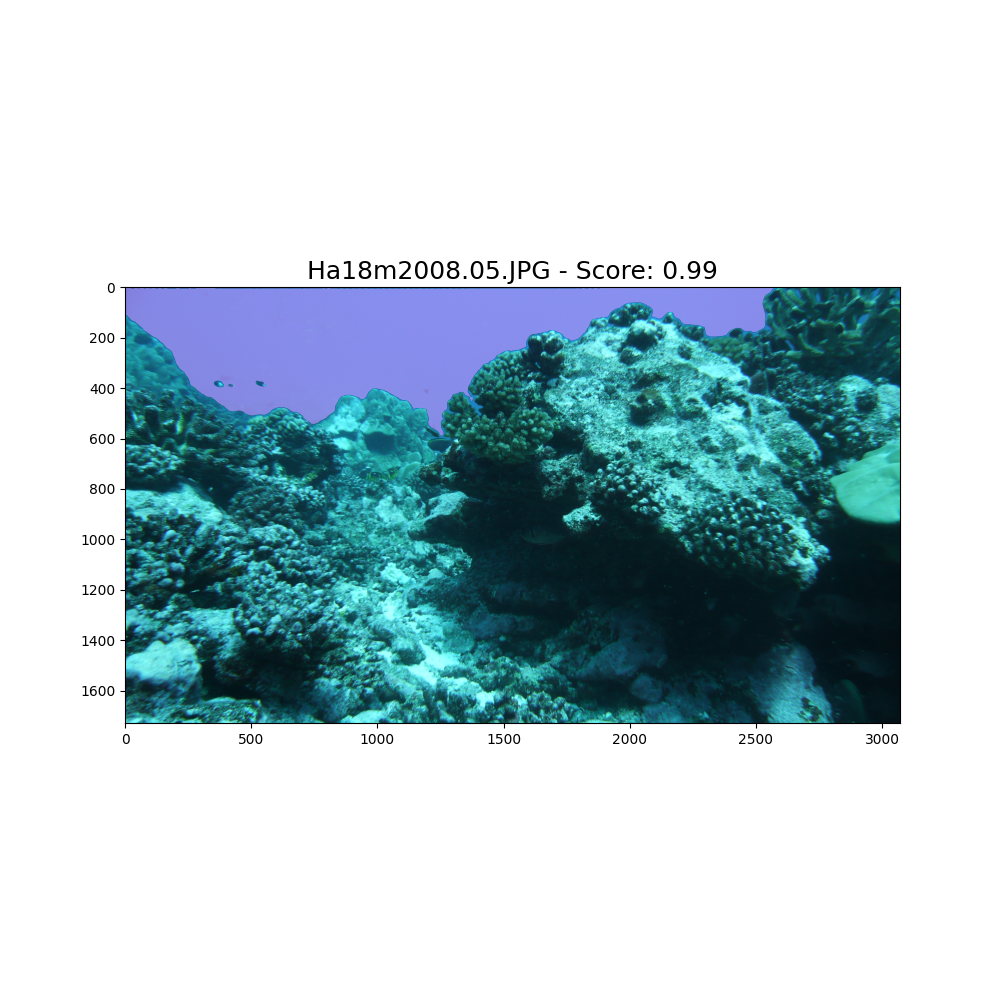

In [20]:
mask, score = find_best_background_mask(predictor, image, list_points=list_points)
line_sam = find_contour_from_mask(mask)
line_meter = get_line_from_left_to_right(mask, line_sam)
mae = compute_mean_absolute_error(line_meter, line_sam)
rugosity_pixels = compute_rugosity(mask, line_sam)
plt = plot_rugosity_results(image, line_meter, line_sam, rugosity_pixels, mae)
plt.show()

# Save results

In [ ]:
plt.savefig(f"results/{image_name}")
with open(f"{image_name}_results.txt", "w") as f:
    f.write(f"{image_name};MAE_{mae};Rugosity_{rugosity_pixels}")